In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing, cross_validation
from scipy.stats.stats import pearsonr
from numpy import inf, nan, log10

from glob import glob 
import pandas

In [37]:
f = pandas.read_csv( '../data_sets/rosetta/enzyme_design_talaris_2013.csv' )
f = f.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() )

df = pandas.read_csv( '../data_sets/experimental/thermo_paper_data_set.csv', index_col=0 )
df[ 'kcat' ] = log10( df.kcat / 880 ) 
df[ 'kcat' ] = log10( df.km / 5 )
df[ 'kcatkm' ] = log10( df.kcatkm / 174000 )

joined = df.join( f ) 

In [38]:
constants = [ 'kcat', 'km', 'kcatkm' ]

# clean up data for sklearn
x_cols = [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm',
    u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm',
    u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
    u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',
    u'SR_1_hbond_pm', u'SR_1_burunsat_pm',
    u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', u'SR_2_total_score',
    u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_hbond_pm',
    u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
    u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', 
    u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',
    u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',
    u'SR_4_hbond_sc', u'SR_4_hbond_pm',
    u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', 
    u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm',
    u'SR_5_burunsat_pm', 
]

(67, 45)
(67,)
(67, 45)
(67,)
(67, 45)
(67,)
(67, 45)
(67,)
(67, 45)
(67,)
(67, 45)
(67,)
(74, 45)
(74,)
(74, 45)
(74,)
(74, 45)
(74,)


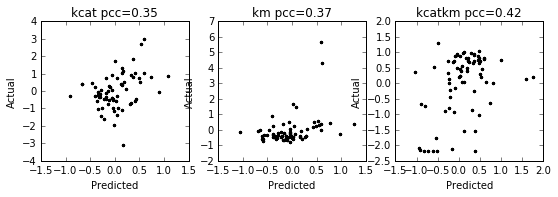

In [39]:
constants = [ 'kcat', 'km', 'kcatkm' ]

plt.figure( figsize=( 9, 2.5 ) ) 

for i, constant in enumerate( constants ):
    
    for j in [ 0, 1, 2 ]:
    
        work = joined[ x_cols + [ constant ] ]
        work = work.replace( [ inf, -inf ], nan ).dropna()

        scaler = preprocessing.StandardScaler()
        J = scaler.fit_transform( work ) 

        X = J[:, :-1]
        y = J[:, -1:].ravel()

        print X.shape
        print y.shape 

        l1_ratio = [ .1, .5, .7, .9, .95, .99, 1 ]

        net = ElasticNetCV( l1_ratio=l1_ratio ) 
        preds = cross_validation.cross_val_predict( net, X, y, cv=10 ) 

        plt.subplot( 1, 3, i + 1 ) 
        plt.scatter( preds, y, marker='.', color='k' )
        plt.xlabel( 'Predicted' ); plt.ylabel( 'Actual' )
        r = pearsonr( preds, y )[0].round(2)
        plt.title( '{} pcc={}'.format( constant, r ) ) 

In [40]:
f

,Unnamed: 0,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
name,,,,,,,,,,,,,,,,,,,,,
A192S,0.0,-711.096,278.949,-73.567,0.004,0.696,0.695,142.9,440.6,149.2,...,0.799,446.0,-5.698,0.876,-3.650,0.000,-11.398,0.901,7.6,1.0
A227W,0.0,6520.660,7494.800,-71.923,0.003,0.701,0.692,146.8,439.5,150.0,...,0.773,446.0,-5.687,0.876,-3.638,0.002,-11.373,0.901,7.6,1.0
A236E,0.0,737.486,1683.026,-71.822,0.005,0.698,0.697,146.6,438.4,147.9,...,0.873,446.0,-5.792,0.865,-3.809,0.003,-11.585,0.902,7.8,1.0
A249E,0.0,-708.439,282.280,-72.344,0.006,0.709,0.698,144.5,440.2,149.7,...,0.875,446.0,-5.808,0.888,-3.842,0.001,-11.615,0.901,7.9,1.0
A356A,0.0,-711.779,278.829,-71.654,0.006,0.702,0.697,145.0,438.9,149.1,...,0.873,446.0,-5.692,0.887,-3.654,0.001,-11.384,0.900,7.5,1.0
A357A,0.0,-711.788,279.111,-71.931,0.005,0.699,0.695,144.8,438.9,148.6,...,0.877,446.0,-5.779,0.872,-3.763,0.001,-11.556,0.902,7.8,1.0
A408A,0.0,-712.415,278.453,-72.294,0.008,0.698,0.695,144.4,439.0,149.7,...,0.875,446.0,-5.739,0.856,-3.696,0.001,-11.478,0.902,7.6,1.0
C167A,0.0,-713.149,278.770,-72.255,0.005,0.700,0.695,144.7,438.6,148.8,...,0.878,446.0,-5.672,0.861,-3.692,0.001,-11.345,0.893,7.6,1.0
C167Q,0.0,-706.650,282.153,-70.437,0.006,0.700,0.697,147.9,438.0,149.1,...,0.924,446.0,-5.481,0.950,-3.331,0.002,-10.963,0.901,7.3,1.0


In [48]:
df = pandas.read_csv( '../data_sets/rosetta/enzyme_design_talaris_2013.csv' )
grouped = df.groupby( 'name' )

grouped.apply( lambda x: x.sort_values( 'SR_5_fa_rep', ascending=False ).head( 10 ).mean() )

,Unnamed: 0,total_score,fa_rep,hbond_sc,all_cst,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,...,SR_4_nlpstat_pm,SR_5,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_all_cst,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
name,,,,,,,,,,,,,,,,,,,,,
A192S,0.0,-699.822,282.117,-71.824,0.007,0.698,0.688,146.6,438.5,151.0,...,0.861,446.0,-5.292,1.036,-3.417,0.005,-10.588,0.901,7.1,1.0
A227W,0.0,6529.754,7497.374,-70.265,0.004,0.700,0.695,147.3,437.7,150.9,...,0.824,446.0,-5.339,1.010,-3.458,0.001,-10.676,0.900,7.2,1.0
A236E,0.0,753.733,1687.794,-69.234,0.003,0.699,0.694,149.9,437.4,149.2,...,0.912,446.0,-5.187,1.045,-3.391,0.002,-10.372,0.904,7.0,1.0
A249E,0.0,-697.114,285.318,-70.430,0.007,0.706,0.699,149.5,436.9,150.0,...,0.874,446.0,-5.208,1.068,-3.463,0.004,-10.415,0.901,7.2,1.0
A356A,0.0,-699.199,282.114,-69.413,0.006,0.702,0.692,147.9,437.0,147.8,...,0.898,446.0,-5.246,1.025,-3.410,0.005,-10.491,0.902,7.0,1.0
A357A,0.0,-700.019,282.423,-70.180,0.008,0.698,0.690,147.7,437.3,149.3,...,0.905,446.0,-5.217,1.049,-3.403,0.005,-10.435,0.903,7.0,1.0
A408A,0.0,-702.876,281.418,-70.465,0.004,0.700,0.699,147.1,438.4,148.4,...,0.904,446.0,-5.343,1.015,-3.472,0.001,-10.686,0.903,7.3,1.0
C167A,0.0,-698.337,282.985,-69.701,0.004,0.688,0.688,146.7,437.6,149.2,...,0.898,446.0,-5.143,1.039,-3.410,0.002,-10.281,0.900,7.0,1.0
C167Q,0.0,-698.159,284.236,-69.171,0.010,0.694,0.698,149.5,436.9,149.2,...,0.918,446.0,-5.226,1.085,-3.228,0.006,-10.456,0.904,7.0,1.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

for i, d in grouped:
    plt.figure( figsize=( 10,10 ) ) 
    d.hist()